### 1) Import of data

In [8]:
import pandas as pd
import numpy as np

In [3]:
tfidf=pd.read_csv("reduced.csv")

In [4]:
tfidf.head()

,shallow,insan,still,circumst,portray,overview,experienc,serv,mountain,cours,...,someon,recogn,danger,senior,suppli,back,independ,crucial,focu,awar
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.158117,0.0,0.0,0.113421,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df=tfidf

y1=[0 for i in range (1000)]
y2=[1 for i in range(1000)]
y=y1+y2
y=np.array(y)

Covariates:

In [10]:
x=df
names=x.columns
x.head()

,shallow,insan,still,circumst,portray,overview,experienc,serv,mountain,cours,...,someon,recogn,danger,senior,suppli,back,independ,crucial,focu,awar
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.158117,0.0,0.0,0.113421,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import math as m

In [11]:
import numpy as np

import os
import numpy as np
os.environ['CMDSTAN'] = '/Users/carlo/.cmdstan/cmdstan-2.30.1'

import cmdstanpy

from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
from sklearn import preprocessing

Responses:

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1])

###### Covariates in a Dataframe "x"
###### Responses in a numpy array "y"

### 2) Normalisation of covariates

In [14]:
x= preprocessing.scale(x)


In [15]:
x=pd.DataFrame(x)
x.columns=names


##### 2.1 Splitting trainin-test

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 60/2000, random_state=0)

In [17]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)


### 3) Spike and Slab prior - Hard shrinkage feature selection

Spike and Slab

In [18]:
 stan_code = """
data {
        int<lower=1> N;
        int<lower=1> p;
        int<lower=0,upper=1> y[N];
        matrix[N,p] x;
        
        real<lower=0> var_spike;
        real<lower=0> var_slab;
        
        
    }
        
     

    
    
    parameters {
       
        vector[p] beta;

        
    }
    
   

   transformed parameters{

     real <lower=0, upper=1> mu[N];
     
     for(i in 1:N)
     {
     
     mu[i]= inv_logit(x[i,:]*beta);
     }
}

    
    model {
        
        y ~ bernoulli(mu);
        
           
        target += log_mix(0.5, 
                         normal_lpdf(beta | 0, var_slab),
                         normal_lpdf(beta | 0, var_spike));
        
       
    }
    
    
     
"""

        
        


    
stan_file_logistic_regression = "./logistic_regression_lib.stan"
 
with open(stan_file_logistic_regression, "w") as f:   
        print(stan_code, file=f)
stan_model = CmdStanModel(stan_file=stan_file_logistic_regression   ,   cpp_options={"STAN_THREADS": True})




16:41:38 - cmdstanpy - INFO - compiling stan file C:\Users\carlo\Bayesian statistics project\logistic_regression_lib.stan to exe file C:\Users\carlo\Bayesian statistics project\logistic_regression_lib.exe
16:41:57 - cmdstanpy - INFO - compiled model executable: C:\Users\carlo\Bayesian statistics project\logistic_regression_lib.exe
16:41:57 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
16:41:57 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/carlo/BAYESI~1/logistic_regression_lib.hpp C:/Users/carlo/BAYESI~1/logistic_regression_lib.stan
Warning in 'C:/Users/carlo/BAYESI~1/logistic_regression_lib.stan', line 5, column 7: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/carlo/BAYESI~1/logistic_regression_lib.st

###### Logistic Regression model  (to evaluate the result of the feature selection)

In [25]:
Logistic_regression_model_1_code = """
data{
  
   int<lower=0> N;
   
   int<lower=0> p;

   
   int y[N];
   
   matrix[N,p] x;
   
}



parameters {

    vector[p] beta;
    
}

transformed parameters{

     real <lower=0, upper=1> mu[N];
     
     for(i in 1:N)
     {
     
     mu[i]= inv_logit(x[i,:]*beta);
     }
}

model{


    y~ bernoulli(mu);
    
    beta[1]~cauchy(0,10);
    
    for (j in 2:p){

    beta~cauchy(0,2.5);
    }

}

generated quantities  {
      vector[N] log_lik;
      for (j in 1:N) {
            log_lik[j] = bernoulli_lpmf(y[j] | mu[j]);
      }
     
}


"""





stan_file_logistic_1 = "./logistic_regression_model_1.stan"

with open(stan_file_logistic_1, "w") as f:   # write the normal code into a file named ./multi_normal.stan
    print(Logistic_regression_model_1_code, file=f)

stan_model1 = CmdStanModel(stan_file=stan_file_logistic_1,   cpp_options={"STAN_THREADS": True})



20:34:21 - cmdstanpy - INFO - compiling stan file C:\Users\carlo\Bayesian statistics project\logistic_regression_model_1.stan to exe file C:\Users\carlo\Bayesian statistics project\logistic_regression_model_1.exe
20:34:43 - cmdstanpy - INFO - compiled model executable: C:\Users\carlo\Bayesian statistics project\logistic_regression_model_1.exe
20:34:43 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
20:34:43 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/carlo/BAYESI~1/logistic_regression_model_1.hpp C:/Users/carlo/BAYESI~1/logistic_regression_model_1.stan
Warning in 'C:/Users/carlo/BAYESI~1/logistic_regression_model_1.stan', line 9, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/carlo/BAYESI~1/lo

In [59]:
N=x_train.shape[0]

p=x_train.shape[1]

x=np.array(x)
y=np.array(y)

In [68]:
x_train.shape

(1940, 2403)

In [60]:
dat = {
    
    "N": N,
    "p": p,
    "y": y_train,
    "x": x_train,
    "var_spike": 0.1,
    "var_slab":10 ,
  
}

stan_fit1 = stan_model.sample(data=dat, chains=2, 
                             parallel_chains=2 ,inits=0  , threads_per_chain=6 )
cmdstanpy_data1 = az.from_cmdstanpy(stan_fit1)

10:10:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

11:17:36 - cmdstanpy - INFO - CmdStan done processing.


In [61]:
x_tr=pd.DataFrame(x_train)
x_tr.columns=names

x_ts=pd.DataFrame(x_test)
x_ts.columns=names

In [62]:
x_tr

,shallow,insan,still,circumst,portray,overview,experienc,serv,mountain,cours,...,someon,recogn,danger,senior,suppli,back,independ,crucial,focu,awar
0,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
1,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
2,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
3,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
4,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,5.741412,-0.139019,-0.065515,-0.060225,0.0,-0.090354,12.492941,-0.126498,-0.097448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
1936,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,0.836330,-0.088804,-0.139019,4.716924,-0.060225,0.0,-0.090354,-0.071771,1.724853,-0.097448
1937,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448
1938,-0.090254,-0.068629,0.0,-0.085741,-0.112636,0.0,-0.109435,-0.147008,-0.074734,-0.218779,...,-0.229737,-0.088804,-0.139019,-0.065515,-0.060225,0.0,-0.090354,-0.071771,-0.126498,-0.097448


In [39]:
import math as m

In [40]:
def compute_mu(betaa,xx):
    
    mu=[]
    
    for i in range(len(xx)):
        
        muu=m.e**(np.dot(xx[i].T,betaa))/(1+m.e**(np.dot(xx[i].T,betaa)))
        
        mu.append(muu)
        
    return mu


def predictions(mu_hat, threshold):
    
    L= len(mu_hat)
    
    out=np.zeros(L)
    
    
    for i in range(L):
        
        if mu_hat[i]>threshold:
            out[i]+=1
            
    return out



    

In [85]:
num_of_feat=[]

probabilities=[0.875,0.88,0.9,0.92]


waic=[]

acc=[]


for prob in probabilities:
    BB=az.hdi(cmdstanpy_data1.posterior,prob)
    
    keep=[]

    for i in range(2403):
   
        if(BB.beta[i][0]<0 and BB.beta[i][1]>0 ):
            {}
        else:
            keep.append(i)
            
    X=x_tr[names[keep]]
    X.insert(0,"1",[1 for i in range(1940)],True)
    
    X_ts=x_ts[names[keep]]
    X_ts.insert(0,"1",[1 for i in range(60)],True)
   
    
    X=np.array(X)
    X_ts=np.array(X_ts)
    
    N=X.shape[0]
    
    num_of_feat.append(len(keep))

    p=len(keep)+1

    y=y
    
    dat = {
    
    "N": N,
    "p": p,
    "y": y_train,
    "x": X,
     }

    stan_fit2 = stan_model1.sample(data=dat, chains=2 ,inits=0, parallel_chains=2)
    cmdstanpy_data2 = az.from_cmdstanpy(stan_fit2)
    
    waic.append(az.waic(cmdstanpy_data2, var_name="log_lik")[0])
    
    beta_chains1=cmdstanpy_data2.posterior.beta
    
    beta_hat1=beta_chains1.mean(dim=["draw","chain"])
    
    posterior_mu1=compute_mu(beta_hat1,X_ts)
    
    pred1=predictions(posterior_mu1,0.5)
    
    confusion_matrix1 = pd.crosstab(y_test, pred1)

    
    acc.append((confusion_matrix1[0][0]+confusion_matrix1[1][1])/60)
    
    
    

    


11:42:52 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

11:44:02 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\arviz\stats\stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
11:44:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

11:44:57 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\arviz\stats\stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
11:45:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

11:45:38 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\arviz\stats\stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
11:45:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

11:46:10 - cmdstanpy - INFO - CmdStan done processing.


C:\Users\carlo\anaconda3\envs\stan_env\lib\site-packages\arviz\stats\stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


In [87]:
print(num_of_feat)
print(waic)
print(acc)


[83, 78, 59, 43]
[-863.2806332322434, -870.647941303703, -920.0771329126413, -992.7748669505705]
[0.7166666666666667, 0.7166666666666667, 0.7333333333333333, 0.6666666666666666]


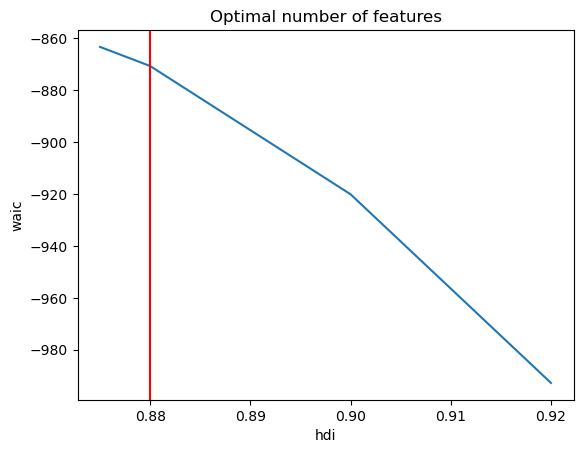

In [95]:
import matplotlib.pyplot 
  
  
# plotting the points 
matplotlib.pyplot.plot(probabilities, waic)
  
# naming the x axis
matplotlib.pyplot.xlabel('hdi')
# naming the y axis
matplotlib.pyplot.ylabel('waic')
  
# giving a title to my graph
matplotlib.pyplot.title('Optimal number of features')

matplotlib.pyplot.axvline(x=0.88,color="r")



  
# function to show the plot
matplotlib.pyplot.show()

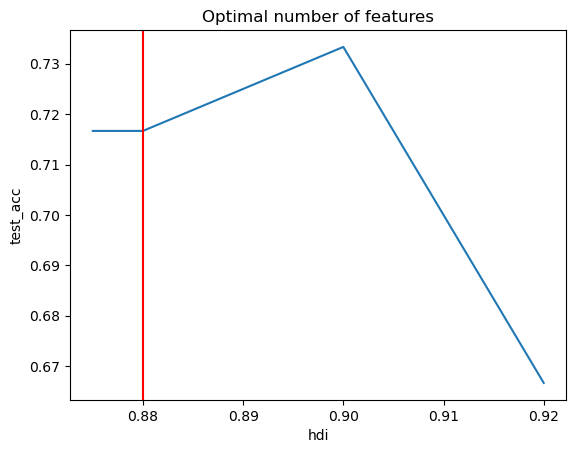

In [96]:
  
  
# plotting the points 
matplotlib.pyplot.plot(probabilities, acc)
  
# naming the x axis
matplotlib.pyplot.xlabel('hdi')
# naming the y axis
matplotlib.pyplot.ylabel('test_acc')
  
# giving a title to my graph
matplotlib.pyplot.title('Optimal number of features')

matplotlib.pyplot.axvline(x=0.88,color="r")



  
# function to show the plot
matplotlib.pyplot.show()

Hard shrinkage

In [90]:
Probablity_of_the_interval=0.88

BB=az.hdi(cmdstanpy_data1.posterior,Probablity_of_the_interval)


# feature selection
keep=[]

for i in range(2403):
   
    if(BB.beta[i][0]<0 and BB.beta[i][1]>0 ):
        {}
    else:
        keep.append(i)
   
   
print("\n")
print("variables to keep")
len(names[keep])



variables to keep


78

In [91]:
names[keep]

Index(['glad', 'journey', 'wast', 'suppos', 'establish', 'claim', 'expect',
       'wonder', 'track', 'teach', 'poorli', 'unfortun', 'vagu', 'felt',
       'shop', 'ridicul', 'forev', 'easili', 'fascin', 'appli', 'easi',
       'statement', 'awesom', 'hell', 'blood', 'passion', 'mistak', 'highli',
       'funni', 'therapi', 'build', 'share', 'enjoy', 'repeat', 'subtl',
       'process', 'current', 'best', 'measur', 'disappoint', 'useless',
       'career', 'rest', 'fantast', 'instead', 'disgust', 'silli', 'visit',
       'textbook', 'fail', 'bad', 'bore', 'excel', 'skip', 'lack', 'proud',
       'noth', 'gift', 'beauti', 'favorit', 'predict', 'entertain', 'post',
       'self', 'vivid', 'repres', 'recent', 'special', 'stupid', 'step',
       'hate', 'worst', 'wors', 'accept', 'client', 'everyth', 'flat', 'long'],
      dtype='object')